In [11]:
import sys
print("python version: %s" %sys.version)


import numpy as np
import math
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.table import Table
import matplotlib.pyplot as ply

givenDec1 = lambda gdVal: float('%.2f' % gdVal) # 2 digits

WORLD_SIZE = 6
A_POS = [0, 1] 		 #(y,x)
A_PRIME_POS = [5, 1]
B_POS = [0, 4]
B_PRIME_POS = [3, 4]

GREY_COLORED_1_POS = [1,1] #(y,x)
GREY_COLORED_2_POS = [1,4]
GREY_COLORED_SIZE = [5,1]

DISCOUNT = 0.6

def draw_values(gvRewardVals, gsFigName):

    '''
    gvRewardVals: a 6x6 numpy array storing opt values for each cell
    (e.g. gvRewardVals = np.zeros((6,6)))

    gsFigName: output file name for visualization (e.g. gridworld_opt_policy_VI.png)
    '''

    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = gvRewardVals.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i, j), val in np.ndenumerate(gvRewardVals):

        #round
        val = np.round(val, decimals=2)

        # add state labels
        if [i, j] == A_POS:
            val = str(val) + " (A)"
        if [i, j] == A_PRIME_POS:
            val = str(val) + " (A')"
        if [i, j] == B_POS:
            val = str(val) + " (B)"
        if [i, j] == B_PRIME_POS:
            val = str(val) + " (B')"
        
        tb.add_cell(i, j, width, height, text=val,
                    loc='center', facecolor='white')
        

    # Row and column labels...
    for i in range(len(gvRewardVals)):
        tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                    edgecolor='none', facecolor='none')
        tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                    edgecolor='none', facecolor='none')

    ax.add_table(tb)

    plt.savefig(gsFigName)
    plt.close()


def draw_policy(gdicPolicy, gsFigName):
    '''
    gdicPolicy: dictionary of values with cell coordinates as keys, and taken actions at the cells as values 
    (0, 0) [0 1 2 3]
    (0, 1) [0 1 2 3]
    ...

    gsFigName: output file name for visualization (e.g. gridworld_opt_policy_VI.png)
    '''

    # left, up, right, down
    ACTIONS = [np.array([0, -1]),
            np.array([-1, 0]),
            np.array([0, 1]),
            np.array([1, 0])]

    ACTIONS_FIGS=[ '←', '↑', '→', '↓']

    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = int(math.sqrt(len(dic_policy))), int(math.sqrt(len(dic_policy)))
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    # for (i, j), val in np.ndenumerate(gvOptValues):
    for cell, pol in gdicPolicy.items():
        
        val=''
        for ba in pol:
            val+=ACTIONS_FIGS[ba]
        
        i = cell[0]
        j = cell[1]
        
        # add state labels
        if [i, j] == A_POS:
            val = str(val) + " (A)"
        if [i, j] == A_PRIME_POS:
            val = str(val) + " (A')"
        if [i, j] == B_POS:
            val = str(val) + " (B)"
        if [i, j] == B_PRIME_POS:
            val = str(val) + " (B')"
        
        tb.add_cell(i, j, width, height, text=val,
                loc='center', facecolor='white')

    # Row and column labels...
    for i in range(int(math.sqrt(len(gdicPolicy)))):
        tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                    edgecolor='none', facecolor='none')
        tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                   edgecolor='none', facecolor='none')

    ax.add_table(tb)

    plt.savefig(gsFigName)
    plt.close()

# sample function call for draw_values()
# v_reward_vals = np.zeros((6,6))
# s_fig_name = "gridworld_sample_soln_v1.png"
# draw_values(v_reward_vals, s_fig_name)


# dic_policy = {}
# for i in range(6):
#     for j in range(6):
#         # dic_policy[(i,j)] = [0,1,2,3]
#         dic_policy[(i,j)] = [0,1,2]
# s_fig_name = "gridworld_sample_policy_v1.png"
# draw_policy(dic_policy, s_fig_name)

python version: 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]




iterative policy evaluation:

1-40.8:
[[-0.6 12.  -0.4 -0.4  6.  -0.6]
 [-0.6 -0.4 -0.4 -0.4 -0.4 -0.6]
 [-0.6 -1.2 -0.4 -0.4 -1.2 -0.6]
 [-0.6 -1.2 -0.4 -0.4 -1.2 -0.6]
 [-0.6 -1.2 -0.4 -0.4 -1.2 -0.6]
 [-0.8 -1.  -0.6 -0.6 -1.  -0.8]]
2-19.992:
[[ 0.55 11.4   0.85  0.13  5.28 -0.17]
 [-0.94  2.22 -0.64 -0.64  0.78 -0.94]
 [-1.03 -1.56 -0.74 -0.74 -1.56 -1.03]
 [-1.03 -1.75 -0.74 -0.74 -1.75 -1.03]
 [-1.06 -1.73 -0.76 -0.76 -1.73 -1.06]
 [-1.26 -1.58 -0.96 -0.96 -1.58 -1.26]]
3-9.53568:
[[ 0.85 11.05  1.11  0.29  4.95 -0.14]
 [-0.44  1.96 -0.1  -0.44  0.49 -0.78]
 [-1.26 -1.09 -0.92 -0.92 -1.44 -1.26]
 [-1.31 -1.99 -0.97 -0.97 -1.99 -1.31]
 [-1.33 -2.03 -0.99 -0.99 -2.03 -1.33]
 [-1.54 -1.87 -1.2  -1.2  -1.87 -1.54]]
4-4.05804:
[[ 0.98 10.88  1.22  0.34  4.8  -0.15]
 [-0.36  2.06 -0.06 -0.39  0.47 -0.82]
 [-1.14 -1.23 -0.78 -0.9  -1.58 -1.27]
 [-1.46 -1.98 -1.09 -1.09 -2.06 -1.46]
 [-1.5  -2.18 -1.14 -1.14 -2.18 -1.5 ]
 [-1.71 -2.04 -1.35 -1.35 -2.04 -1.71]]
5-1.96287:
[[ 1.02 10.78

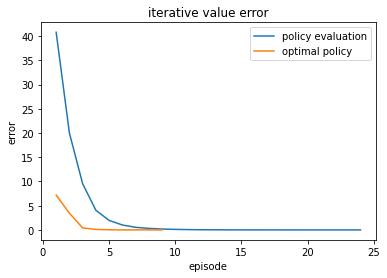

In [15]:
#######################################################################
# Copyright (C)                                                       #
# 2019 Baochen Su(subaochen@126.com)                                  #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################


# north (action 0), east (action 1), south (action 2), and west (action 3)

ACTIONS = [np.array([-1, 0]),  # up 	# north (action 0) 
           np.array([0, 1]),   # right	# east (action 1)
           np.array([1, 0]),   # down	# south (action 2)
		   np.array([0, -1])]  # left   # west (action 3)

def policy_action_probability (action):
    """policy where at each cell agent moves north with 0.4 and in any one of the other directions with probability 0.2 
        (i.e. π 0 = 0.4, π 1 = π 2 = π 3 = 0.2).
    """
    action_prob = 0.2
    if (action == ACTIONS[0]).all():    # north (action 0) 
      action_prob = 0.4
    return action_prob



def step(state, action):
    """
    :param state:[1,1]
    :param action:
    :return:reward
    """
    if state == A_POS:
        return A_PRIME_POS, 12
    if state == B_POS:
        return B_PRIME_POS, 6

    next_state = (np.array(state) + action).tolist()
    x, y = next_state

    if x < 0 or x >= WORLD_SIZE or y < 0 or y >= WORLD_SIZE:
        reward = -1.0
        next_state = state

    elif ( ((x >=  GREY_COLORED_1_POS[0] and x <= (GREY_COLORED_1_POS[0] + (GREY_COLORED_SIZE[0] -1)) ) and
			     (y >=  GREY_COLORED_1_POS[1] and y <= (GREY_COLORED_1_POS[1] + (GREY_COLORED_SIZE[1] -1)) ) 
		      )
          or
          ((x >=  GREY_COLORED_2_POS[0] and x <= (GREY_COLORED_2_POS[0] + (GREY_COLORED_SIZE[0] -1)) ) and
			     (y >=  GREY_COLORED_2_POS[1] and y <= (GREY_COLORED_2_POS[1] + (GREY_COLORED_SIZE[1] -1)) ) 
          )
       ) : 
        reward = -2.0

    else:
        reward = 0
  
    return next_state, reward


def grid_world_value_function():
    """iterative policy evaluation
    """
    print(f"\n\niterative policy evaluation:\n")
    value = np.zeros((WORLD_SIZE, WORLD_SIZE))
    episode = 0
    history = {}
    while True:
        episode = episode + 1

        new_value = np.zeros_like(value)
        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                for action in ACTIONS:
                    (next_i, next_j), reward = step([i, j], action)
                    # bellman equation
                    action_prob = policy_action_probability(action)
                    new_value[i, j] += action_prob * (reward + DISCOUNT * value[next_i, next_j])

        error = np.sum(np.abs(new_value - value))
        history[episode] = error
        if error < 1e-4:
            print(f"\niterCt = {episode}, val A = {np.round(value[A_POS[0],A_POS[1]],decimals=2)}, val B = {np.round(value[B_POS[0],B_POS[1]],decimals=2)} \n")
            break

        print(f"{episode}-{np.round(error,decimals=5)}:\n{np.round(new_value,decimals=2)}")
        value = new_value

    return value, history



def grid_world_optimal_policy():
    """optimal policy
    """
    print(f"\n\noptimal policy :\n")

    value = np.zeros((WORLD_SIZE, WORLD_SIZE))
    optimal_policy = {} 
    episode = 0
    history = {}    
    while True:
        episode = episode + 1
        # keep iteration until convergence
        new_value = np.zeros_like(value)
        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                # action state value
                action_values = []
                for action in ACTIONS:
                    (next_i, next_j), reward = step([i, j], action)
                    action_prob = policy_action_probability(action)
                    # value iteration
                    action_values.append(action_prob * (reward + DISCOUNT * value[next_i, next_j]))

                new_value[i, j] = np.max(action_values)
                optimal_policy[(i,j)] = get_optimal_actions(action_values)
                
        error = np.sum(np.abs(new_value - value))
        history[episode] = error
        if error < 1e-4:
            print(f"\niterCt = {episode}, val A = {np.round(value[A_POS[0],A_POS[1]],decimals=2)}, val B = {np.round(value[B_POS[0],B_POS[1]],decimals=2)} \n")
            break

        print(f"{episode}-{np.round(error,decimals=5)}:\n{np.round(new_value,decimals=2)}")
        value = new_value

    return value, optimal_policy, history


def get_optimal_actions(values):
    """
    :param values:
    :return: 
    """
    optimal_actions = []
    indices = np.where(values == np.amax(values))
    for index in indices[0]:
        optimal_actions.append(index)
    return optimal_actions



def plot_his(history, title):
    for his in history:
        index, error = his.keys(), his.values()
        ply.plot(list(index), list(error))

    ply.title(title)
    ply.xlabel("episode")
    ply.ylabel("error")
    if len(history) != 1:
        ply.legend(["policy evaluation", "optimal policy"])
    ply.show()


if __name__ == '__main__':

    v_reward_vals, history1 = grid_world_value_function()
    s_fig_name = "gridworld_sample_iterative_value_v1.png"
    draw_values(v_reward_vals, s_fig_name)

    v_reward_vals, dic_policy, history2 = grid_world_optimal_policy()
    s_fig_name = "gridworld_sample_optimal_value_v1.png"
    draw_values(v_reward_vals, s_fig_name)
    s_fig_name = "gridworld_sample_optimal_policy_v1.png"
    draw_policy(dic_policy, s_fig_name)

    plot_his([history1,history2], "iterative value error")